In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

df = pd.read_csv("palmer_penguins.csv")
df = df.dropna()

X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
y = df.species.to_numpy()


In [2]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (333, 4)
np.shape(sigma) = (4,)
np.shape(Vt) = (4, 4) 



In [3]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



In [4]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

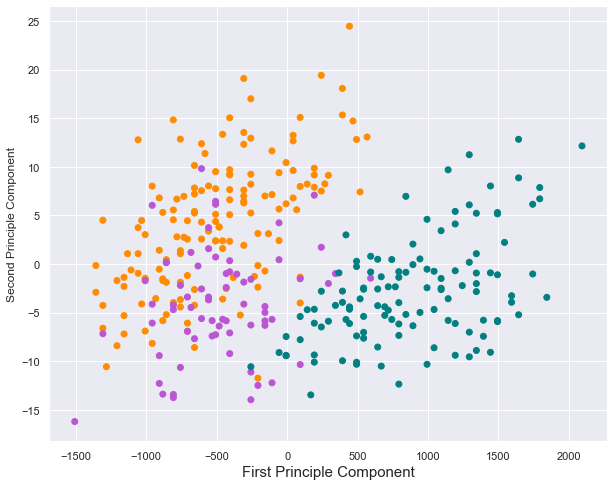

In [5]:
def colors(y):
    if y == "Gentoo":
        return "teal"
    elif y == "Adelie":
        return "darkorange"
    else:
        return "mediumorchid"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()

In [6]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.68633893 0.19452929 0.09216063 0.02697115]
per_var = [68.63 19.45  9.22  2.7 ] 



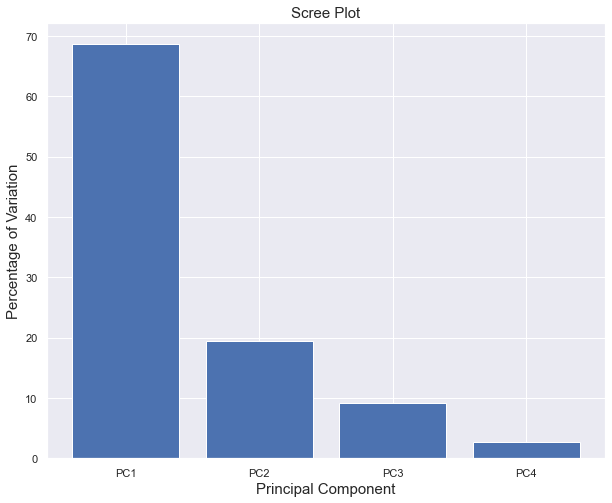

In [7]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [8]:
# we call function pca.components_ to see how each PC is obtained
# as a linear combination of the original coordinates

# for example, here PC1 = 0.522 * sepal_length + 0.372 * sepal_width - 0.721 * petal_length - 0.262 * petal_width

features = list(set(df.columns) - {"species",'island','sex','Unnamed: 0'})

features

pd.DataFrame(data = pca.components_, columns = labels, index = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])

,PC1,PC2,PC3,PC4
bill_length_mm,0.453753,-0.399047,0.576825,0.549675
bill_depth_mm,0.600195,0.796170,0.005788,0.076464
flipper_length_mm,0.642495,-0.425800,-0.236095,-0.591737
body_mass_g,0.145170,-0.159904,-0.781984,0.584686


In [9]:
# we use pca.transform to see how our data looks like in the new coordinate system

# this will be used later to plot our data in the first two coordinates PC1, PC2

pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

len(pca_df)
len(df.species)
pca_df

,PC1,PC2,PC3,PC4
0,-1.853593,0.032069,-0.234902,0.528397
1,-1.316254,-0.443527,-0.027470,0.401727
2,-1.376605,-0.161230,0.189689,-0.528662
3,-1.885288,-0.012351,-0.628873,-0.472893
4,-1.919981,0.817598,-0.701051,-0.196416
...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892
329,1.832651,-0.784510,0.240758,-0.008955
330,2.751505,0.266556,-0.419306,0.236256
331,1.713854,-0.725875,-0.262764,0.330004


In [10]:
# we add to the previous table the labels for each flower

#projected_df = pd.concat([pca_df, y], axis = 1)
pca_df['species'] = y 

In [11]:
pca_df

,PC1,PC2,PC3,PC4,species
0,-1.853593,0.032069,-0.234902,0.528397,Adelie
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie
3,-1.885288,-0.012351,-0.628873,-0.472893,Adelie
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie
...,...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892,Gentoo
329,1.832651,-0.784510,0.240758,-0.008955,Gentoo
330,2.751505,0.266556,-0.419306,0.236256,Gentoo
331,1.713854,-0.725875,-0.262764,0.330004,Gentoo


In [12]:
pca_df["color"] = c
pca_df


,PC1,PC2,PC3,PC4,species,color
0,-1.853593,0.032069,-0.234902,0.528397,Adelie,darkorange
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie,darkorange
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie,darkorange
3,-1.885288,-0.012351,-0.628873,-0.472893,Adelie,darkorange
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie,darkorange
...,...,...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892,Gentoo,teal
329,1.832651,-0.784510,0.240758,-0.008955,Gentoo,teal
330,2.751505,0.266556,-0.419306,0.236256,Gentoo,teal
331,1.713854,-0.725875,-0.262764,0.330004,Gentoo,teal


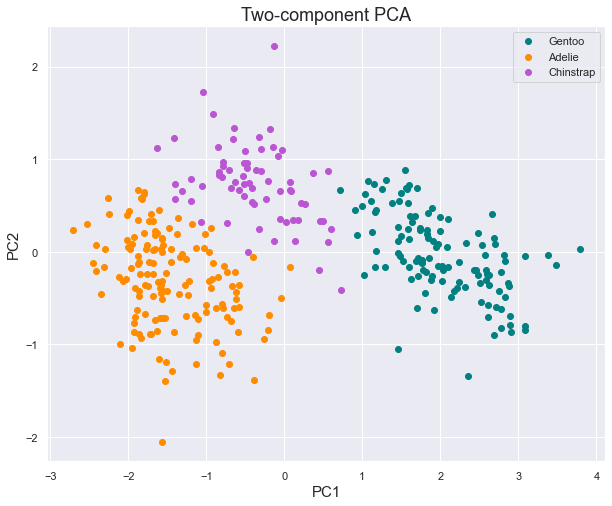

In [13]:
targets = ["Gentoo", "Adelie", "Chinstrap"]
colors = ["teal", "darkorange", "mediumorchid"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = pca_df[pca_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC3"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()